In [2]:
import pandas
from sklearn.svm import *
from sklearn.preprocessing import *

In [3]:
data = pandas.read_csv('train.csv')

In [4]:
data.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A667095,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [5]:
import datetime
date_list = [ datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in data['DateTime'] ]
data['date'] = [x.date().isoformat() for x in date_list]
data['year'] = [x.date().year for x in date_list]
data['month'] = [x.date().month for x in date_list]

data['time'] = [x.time().isoformat() for x in date_list]
del date_list

In [6]:
%matplotlib inline
#breed 频次 > 10的数据占90%，可以只取这部分one-hot
breeds = data.Breed.value_counts()
print(breeds[breeds > 10].count())

181


In [7]:
data.groupby('OutcomeType').SexuponOutcome.describe()

OutcomeType            
Adoption         count             10769
                 unique                4
                 top       Neutered Male
                 freq               5222
Died             count               197
                 unique                5
                 top         Intact Male
                 freq                 79
Euthanasia       count              1555
                 unique                5
                 top         Intact Male
                 freq                477
Return_to_owner  count              4785
                 unique                5
                 top       Neutered Male
                 freq               2247
Transfer         count              9422
                 unique                5
                 top       Intact Female
                 freq               2550
dtype: object

In [8]:
data.groupby('OutcomeType').SexuponOutcome.value_counts()

OutcomeType      SexuponOutcome
Adoption         Neutered Male     5222
                 Spayed Female     5186
                 Intact Female      203
                 Intact Male        158
Died             Intact Male         79
                 Intact Female       56
                 Unknown             25
                 Neutered Male       19
                 Spayed Female       18
Euthanasia       Intact Male        477
                 Intact Female      401
                 Neutered Male      344
                 Spayed Female      232
                 Unknown            101
Return_to_owner  Neutered Male     2247
                 Spayed Female     1748
                 Intact Male        477
                 Intact Female      301
                 Unknown             12
Transfer         Intact Female     2550
                 Intact Male       2334
                 Neutered Male     1947
                 Spayed Female     1636
                 Unknown            955
dtype: i

In [9]:
data.SexuponOutcome.value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [10]:
data.groupby('OutcomeType').AgeuponOutcome.describe()

OutcomeType            
Adoption         count        10769
                 unique          28
                 top       2 months
                 freq          2636
Died             count          197
                 unique          31
                 top        1 month
                 freq            48
Euthanasia       count         1553
                 unique          39
                 top        2 years
                 freq           275
Return_to_owner  count         4786
                 unique          35
                 top        2 years
                 freq           917
Transfer         count         9406
                 unique          41
                 top         1 year
                 freq          1417
dtype: object

In [11]:
data.groupby('OutcomeType').AgeuponOutcome.describe()

OutcomeType            
Adoption         count        10769
                 unique          28
                 top       2 months
                 freq          2636
Died             count          197
                 unique          31
                 top        1 month
                 freq            48
Euthanasia       count         1553
                 unique          39
                 top        2 years
                 freq           275
Return_to_owner  count         4786
                 unique          35
                 top        2 years
                 freq           917
Transfer         count         9406
                 unique          41
                 top         1 year
                 freq          1417
dtype: object

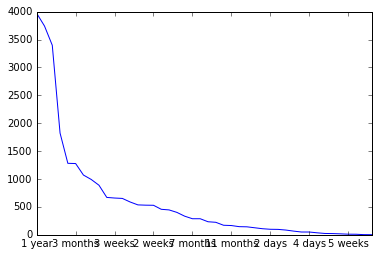

In [12]:
data.AgeuponOutcome.value_counts().plot()

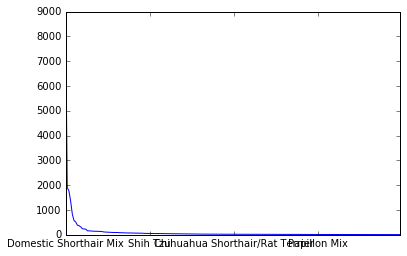

In [13]:
data.Breed.value_counts().head(200).plot()

In [14]:
data[(data.year == 2014) | (data.year == 2015)].groupby('OutcomeType').month.value_counts()

OutcomeType      month
Adoption         7        1151
                 8         955
                 6         830
                 12        823
                 9         780
                 10        742
                 11        739
                 5         686
                 1         653
                 3         571
                 2         548
                 4         500
Died             7          29
                 6          27
                 5          18
                 8          17
                 10         15
                 11         14
                 9          12
                 3          11
                 12          9
                 1           8
                 4           7
                 2           6
Euthanasia       6         161
                 7         145
                 5         130
                 8         111
                 3         108
                 9         106
                 4         101
                

In [23]:
colors = data.Color.value_counts()
print(colors.count())
print(colors[colors>15].count())

366
109
